In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
type(soup)


# Get the title
title = soup.title
print(title)

# Print out the text
text = soup.get_text()
#print(soup.text)

soup.find_all('a')

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])


<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None
[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>Chip Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img cla

In [7]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)


[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [8]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, 1:41:18, 1:42:10, ]


In [9]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, 1:41:18, 1:42:10, ]


str

In [10]:
df = pd.DataFrame(list_rows)
df.head(10)


,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [11]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None
4,[],None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [12]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None
4,],None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [14]:
col_labels = soup.find_all('th')
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, Chip Time, Gun Time, Team]']


In [15]:
df2 = pd.DataFrame(all_header)
df2.head()


,0
0,"[Place, Bib, Name, Gender, City, Chip Time, Gu..."


In [16]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]


In [17]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)


,0,1,2,3,4,5,6,7
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None
4,],None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]


In [18]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()


,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None


In [19]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    Chip Time  578 non-null    object
 6    Gun Time   578 non-null    object
 7    Team]      578 non-null    object
dtypes: object(8)
memory usage: 41.0+ KB


(583, 8)

In [20]:
df6 = df5.dropna(axis=0, how='any')
df6.info()
df6.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 578 entries, 0 to 581
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      578 non-null    object
 1    Bib        578 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    Chip Time  578 non-null    object
 6    Gun Time   578 non-null    object
 7    Team]      578 non-null    object
dtypes: object(8)
memory usage: 40.6+ KB


(578, 8)

In [21]:
df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [22]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()


,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [23]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()


,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...


In [51]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    try:
        h, m = i.split(':')
        math = (int(h) * 3600 + int(m) * 60)/60
        time_mins.append(math)
    except ValueError:
        continue
print(time_mins)

[2181.0, 2202.0, 2264.0, 2314.0, 2361.0, 2389.0, 2404.0, 2405.0, 2417.0, 2421.0, 2428.0, 2436.0, 2443.0, 2461.0, 2479.0, 2503.0, 2519.0, 2543.0, 2549.0, 2555.0, 2556.0, 2557.0, 2576.0, 2606.0, 2607.0, 2620.0, 2622.0, 2623.0, 2626.0, 2626.0, 2627.0, 2627.0, 2644.0, 2645.0, 2646.0, 2647.0, 2663.0, 2678.0, 2681.0, 2682.0, 2688.0, 2703.0, 2705.0, 2710.0, 2711.0, 2711.0, 2713.0, 2714.0, 2715.0, 2717.0, 2727.0, 2728.0, 2729.0, 2736.0, 2736.0, 2740.0, 2740.0, 2749.0, 2755.0, 2762.0, 2773.0, 2780.0, 2783.0, 2786.0, 2793.0, 2795.0, 2801.0, 2802.0, 2805.0, 2806.0, 2807.0, 2809.0, 2809.0, 2812.0, 2815.0, 2816.0, 2820.0, 2822.0, 2825.0, 2825.0, 2828.0, 2829.0, 2847.0, 2849.0, 2851.0, 2855.0, 2862.0, 2865.0, 2869.0, 2870.0, 2875.0, 2876.0, 2876.0, 2878.0, 2879.0, 2889.0, 2893.0, 2898.0, 2898.0, 2900.0, 2901.0, 2909.0, 2910.0, 2917.0, 2918.0, 2919.0, 2920.0, 2922.0, 2923.0, 2924.0, 2929.0, 2936.0, 2943.0, 2949.0, 2952.0, 2958.0, 2963.0, 2966.0, 2970.0, 2972.0, 2975.0, 2982.0, 2984.0, 2984.0, 2991.0,

In [63]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    try:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
        time_mins.append(math)
    except ValueError:
        continue
print(time_mins)


[60.016666666666666, 60.05, 60.2, 60.2, 60.21666666666667, 60.21666666666667, 60.3, 60.3, 60.3, 60.31666666666667, 60.333333333333336, 60.38333333333333, 60.4, 60.65, 60.68333333333333, 60.7, 60.78333333333333, 60.81666666666667, 60.93333333333333, 60.983333333333334, 61.016666666666666, 61.166666666666664, 61.3, 61.31666666666667, 61.35, 61.36666666666667, 61.36666666666667, 61.45, 61.5, 61.5, 61.53333333333333, 61.583333333333336, 61.8, 61.8, 61.8, 61.81666666666667, 62.06666666666667, 62.083333333333336, 62.083333333333336, 62.1, 62.166666666666664, 62.3, 62.35, 62.36666666666667, 62.416666666666664, 62.483333333333334, 62.5, 62.6, 62.65, 62.68333333333333, 62.71666666666667, 62.733333333333334, 62.78333333333333, 62.8, 62.8, 62.8, 63.03333333333333, 63.05, 63.13333333333333, 63.28333333333333, 63.31666666666667, 63.56666666666667, 63.56666666666667, 63.6, 63.733333333333334, 63.733333333333334, 63.81666666666667, 63.85, 63.85, 63.88333333333333, 64.11666666666666, 64.15, 64.15, 64.

In [64]:
df7['Runner_mins'] = pd.Series(time_mins)
df7.head()

,Place,Bib,Name,Gender,City,Chip Time,Gun Time,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,36:21,36:24,,60.216667
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,36:42,36:45,\n\r\n INTEL TEAM ...,60.300000
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,37:44,37:48,,60.300000
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,38:34,38:37,,60.300000
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,39:21,39:24,\n\r\n INTEL TEAM ...,60.316667


In [65]:
df7.describe(include=[np.number])


,Runner_mins
count,266.000000
mean,70.298747
std,8.932796
min,60.216667
25%,64.150000
50%,67.900000
75%,73.320833
max,101.300000


([<matplotlib.axis.XTick at 0x2848e4b3e50>], [Text(1, 0, 'Runners')])

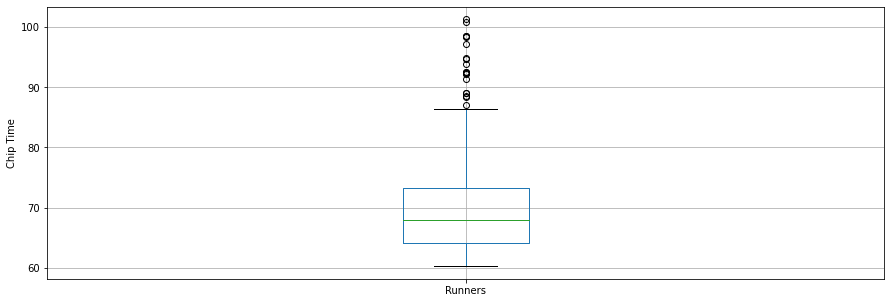

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
 
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])


C:\Users\rucha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


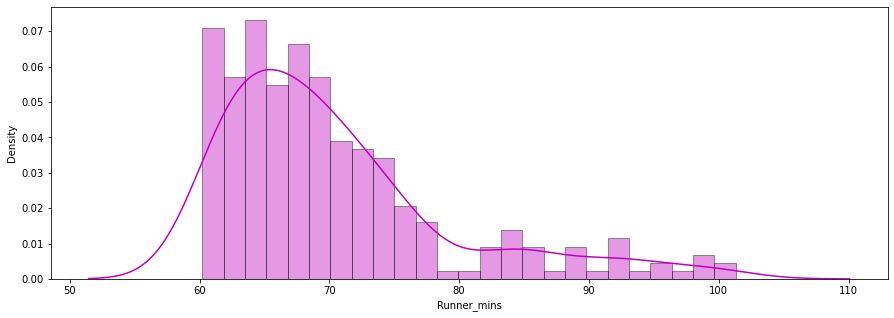

In [67]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


C:\Users\rucha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rucha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


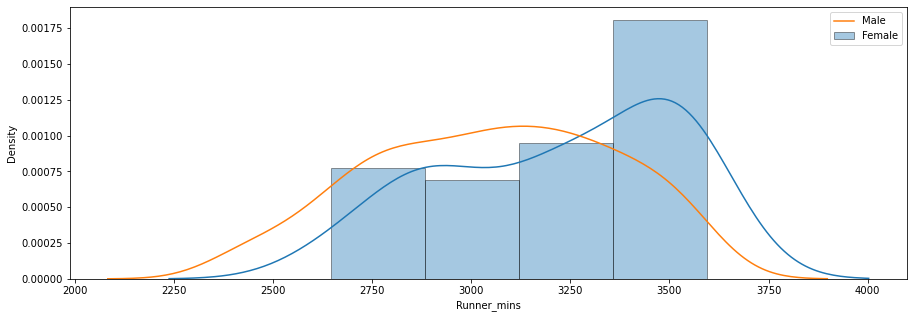

In [58]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


In [69]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F             35.0  72.630476  10.114199  61.800000  65.100000  70.916667   
 M            231.0  69.945455   8.709917  60.216667  63.833333  67.683333   

                                
               75%         max  
 Gender                         
 F       74.233333   98.283333  
 M       72.800000  101.300000  


Text(0.5, 0.98, '')

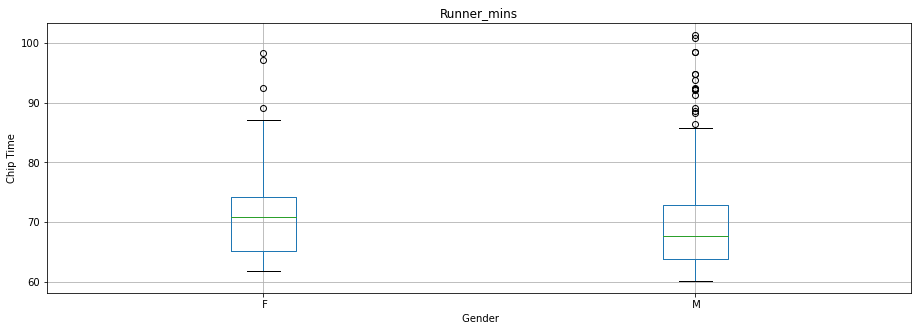

In [71]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")
